<a href="https://colab.research.google.com/github/R0bs0nRamos/Grupo11/blob/main/googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Trabajo Práctico - Google Play store
## Materia: Desarrollo de Sistemas de IA
### Integrantes del grupo:
- Cynthia Guzman - Dataset: [Población Argentina]
- Robson Ramos - Dataset: [Robo o Hurto]
- Flores Zoraida - Dataset: [Google Play Store y Reviews]
- Nombre Apellido 3 - Dataset: [Nombre del dataset 3]

---

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/16ifqOKwyuU-CVv7_ghA76gnXAiR-I8rz/view?usp=drive_link

id='16ifqOKwyuU-CVv7_ghA76gnXAiR-I8rz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('googleplaystore.csv')

In [ ]:
google = pd.read_csv('googleplaystore.csv')

In [ ]:
#https://drive.google.com/file/d/1iGtlFDMGZ28bzI4sLpym9lSO8w11Hgqn/view?usp=drive_link


id='1iGtlFDMGZ28bzI4sLpym9lSO8w11Hgqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('googleplaystore_user_reviews.csv')

In [ ]:
reviews=pd.read_csv('googleplaystore_user_reviews.csv')

# **Introducción**

**Google Play Store** es una plataforma de distribución digital de aplicaciones móviles para dispositivos Android, es uno de los mercados más grandes y populares para aplicaciones móviles en todo el mundo.  En esta plataforma, los desarrolladores pueden subir y distribuir sus aplicaciones, mientras que los usuarios pueden descubrir, descargar y calificar estas aplicaciones.

El dataframe goole play store contiene las sgtes columnas

| **Columna**      | **Descripción**                                                                  |
| ---------------- | -------------------------------------------------------------------------------- |
| `App`            | Nombre de la aplicación|
| `Category`       | Categoría a la que pertenece la app (Ej:GAME,EDUCATION, etc.)|
| `Rating`         | Calificación dada por los usuarios|
| `Reviews`        | Número total de reseñas|
| `Size`           | Tamaño del archivo de instalación de la app.|
| `Installs`       | Instalaciones que tiene la app.|
| `Type`           | Tipo de descarga: gratuita o pago |
| `Price`          | Precio de la app. 0 indica que es gratuita|
| `Content_Rating` | Clasificación por edad (Ej: Everyone, Teen, Mature 17+, etc.)|
| `Genres`         | Género(s) específico(s) de la app. Algunas tienen más de uno, separados por `;`. |
| `Last_Updated`   | Fecha de la última actualización de la app|
| `Current_Ver`    | Versión actual de app|
| `Android_Ver`    | Versión mínima de Android requerida para instalar la app|


# **Análisis Exploratorio**

* **Google play store**


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
google.shape

(10841, 13)

In [ ]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
google.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


* **Reviews**

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.53
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.29
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.88
4,10 Best Foods for You,Best idea us,Positive,1.00,0.30


In [ ]:
reviews.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


# ***Limpieza de Datos***

## **Google play store**

In [ ]:
google.rename({'Content Rating': 'Content_Rating', "Current Ver": "Current_Ver", "Android Ver": "Android_Ver", "Last Updated":"Last_Updated"}, axis=1, inplace = True)

Vamos agrupar Adults only con Mature 17 y eliminar Unrated

In [ ]:
google.Content_Rating.value_counts()

,count
Content_Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


In [ ]:
google = google[(google['Content_Rating'] != 'Unrated')]

In [ ]:
adultos = google[(google['Content_Rating'] == 'Adults only 18+')]
adultos

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
298,Manga Master - Best manga & comic reader,COMICS,4.60,24005,4.9M,"500,000+",Free,0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.50,50017,41M,"1,000,000+",Free,0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.80,7326,Varies with device,"500,000+",Free,0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [ ]:
google['Content_Rating'] = google['Content_Rating'].replace('Adults only 18+', 'Mature 17+')

In [ ]:
google.Content_Rating.value_counts()

,count
Content_Rating,
Everyone,8714
Teen,1208
Mature 17+,502
Everyone 10+,414


### **Conversión de datos**

* **Conversión a datos Categoricos**

In [ ]:
#google.App = google.App.astype("category")  este conviene dejarlo como object pq ocupa menos memoria
#google.Category = google.Category.astype("category")
google.Type = google.Type.astype("category")
#google.Content_Rating = google.Content_rating.astype("category")
google.Genres = google.Genres.astype("category")

In [ ]:
google.shape

(10839, 13)

In [ ]:
#Veo que datos tiene Type
google.Type.value_counts()

,count
Type,
Free,10037
Paid,800
0,1


In [ ]:
google = google[google['Type'] != '0']

In [ ]:
google['Type'] = google['Type'].cat.remove_unused_categories()

In [ ]:
google.Type.value_counts()

,count
Type,
Free,10037
Paid,800


In [ ]:
google.shape

(10838, 13)

In [ ]:
#hay duplicados en la col App, vamos a tomar aquella App con mayor reviews y eliminar las App duplicados
google.App.value_counts()

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
Duolingo: Learn Languages Free,7
ESPN,7
8 Ball Pool,7
...,...
Photo Designer - Write your name with shapes,1
payermonstationnement.fr,1
News Minecraft.fr,1


In [ ]:
google[google['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.50,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.50,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.50,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.50,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.50,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.50,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.50,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.50,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.50,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
google = google.sort_values('Reviews', ascending=False).drop_duplicates('App').sort_index()

In [ ]:
google[google['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2206,ROBLOX,FAMILY,4.50,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
google.shape

(9657, 13)

* **Conversión a Datos Numericos**

In [ ]:
# string convierto a un entero
google['Reviews'] = google['Reviews'].astype(str).astype(int)

In [ ]:
# Eliminar ese + y , para luego convertirlo en un dato numerico
google.Installs.unique()

array(['10,000+', '5,000,000+', '50,000,000+', '100,000+', '50,000+',
       '1,000,000+', '10,000,000+', '5,000+', '500,000+',
       '1,000,000,000+', '100,000,000+', '1,000+', '500,000,000+', '50+',
       '100+', '500+', '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
google.Installs=google.Installs.apply(lambda x: x.strip('+'))
google.Installs=google.Installs.apply(lambda x: x.replace(',',''))
google['Installs'] = google['Installs'].astype(str).astype(int)
google.Installs.unique()

array([     10000,    5000000,   50000000,     100000,      50000,
          1000000,   10000000,       5000,     500000, 1000000000,
        100000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
google.Installs.value_counts()

,count
Installs,
1000000,1418
100000,1113
10000,1030
10000000,934
1000,888
100,710
5000000,608
500000,505
50000,468


Observamos que tenemos App con ninguna Instalación por lo que no hace relevante este dato para nuestro análisis, ya que no aporta ninguna Reviews ni Rating

In [ ]:
InstallsNulos = google[google['Installs'] == 0]
InstallsNulos

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",1.1,4.2 and up
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0,Paid,$13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0,Paid,$1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0,Paid,$2.99,Everyone,Education,"April 15, 2016",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0,Free,0,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
8081,CX Network,BUSINESS,NaN,0,10M,0,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
google = google[(google['Installs'] > 0)]

In [ ]:
google.Rating.unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, nan, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 2.5, 2.8, 2.7,
       1. , 1.9, 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [ ]:
# Sacar el $
google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$5.49', '$10.00',
       '$11.99', '$79.99', '$1.00', '$29.99', '$12.99', '$14.99', '$2.49',
       '$10.99', '$24.99', '$1.50', '$19.99', '$15.99', '$9.00', '$16.99',
       '$74.99', '$33.99', '$39.99', '$3.95', '$4.49', '$1.70', '$8.99',
       '$2.00', '$3.88', '$25.99', '$399.99', '$17.99', '$400.00',
       '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50', '$1.59',
       '$6.49', '$1.29', '$5.00', '$299.99', '$379.99', '$37.99',
       '$18.99', '$389.99', '$19.90', '$8.49', '$1.75', '$14.00', '$4.85',
       '$46.99', '$109.99', '$3.08', '$2.59', '$4.80', '$1.96', '$19.40',
       '$3.90', '$4.59', '$15.46', '$3.04', '$13.99', '$4.29', '$2.60',
       '$3.28', '$4.60', '$28.99', '$2.95', '$2.90', '$1.97', '$89.99',
       '$2.56', '$3.61', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
google.Price = google.Price.apply(lambda x: x.strip('$'))
google.Price = google.Price.apply(lambda x: float(x))
google.Price.value_counts()

,count
Price,
0.00,8896
0.99,145
2.99,123
1.99,72
4.99,70
...,...
2.56,1
3.61,1
1.26,1


In [ ]:
google.Size.value_counts()

,count
Size,
Varies with device,1226
11M,182
12M,181
14M,177
13M,177
...,...
626k,1
161k,1
879k,1


In [ ]:
#Necesito que todos esten en la misma medida, así que todos lo dejamos en k
google.Size.unique()

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '46M', '51M', '48M', '8.5M', '41M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '8.4M', '118k', '44M', '695k', '1.6M',
       '6.2M

In [ ]:
google['Size'] = google['Size'].replace('Varies with device', '0')

# Convierto todos los tamaños a megabytes (MB)
google['Size'] = google['Size'].apply(lambda x: float(x.replace('M', '')) if 'M' in x else
                                      float(x.replace('k', '')) / 1024 if 'k' in x else
                                      float(x) / 1024)

In [ ]:
#Genero las col Reviews e Instalaciones en formato logaritmico
google['Reviews_log'] = np.log(google['Reviews']+1)
google['Installs_log'] = np.log(google['Installs']+1)

* **Conversión de object a datatime**

In [ ]:
google['Last_Updated']=pd.to_datetime(google['Last_Updated'])
google['year'] = google['Last_Updated'].dt.year
google['month'] = google['Last_Updated'].dt.month

In [ ]:
google.year.value_counts()

,count
year,
2018,6278
2017,1787
2016,778
2015,447
2014,203
2013,108
2012,25
2011,15
2010,1


In [ ]:
# Vemos que en los años 2012 al 2010, representa menos del 1% del total de los datos, por lo que no lo vamos a considerar en nuestro analisis
google = google[google['year'] >= 2013]

In [ ]:
google.shape

(9601, 17)

### **Tratamientos de datos nulos**

**1)** Vamos a dropear los datos nulos de las columnas Type, Current_ver, Android_ver, ya que representan menos del 1% del total de datos del archivo google

**2)** La columna Rating, se va imputar según la relación "fuerte" que tenga con las otras columnas

In [ ]:
cantidad_nulos = google.isnull().sum().reset_index().rename(columns = {0:'cantidad', 'index':'columnas'})
cantidad_nulos['porcentaje'] = (cantidad_nulos['cantidad'] / len(google)) * 100
cantidad_nulos

,columnas,cantidad,porcentaje
0,App,0,0.00
1,Category,0,0.00
2,Rating,1442,15.02
3,Reviews,0,0.00
4,Size,0,0.00
5,Installs,0,0.00
6,Type,0,0.00
7,Price,0,0.00
8,Content_Rating,0,0.00
9,Genres,0,0.00


In [ ]:
google.shape

(9601, 17)

**Eliminación de datos nulos**

**Caso (1)**

In [ ]:
google[(google['Android_Ver'].isnull()) | (google['Current_Ver'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Reviews_log,Installs_log,year,month
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.20,55,2.70,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up,4.03,8.52,2018,6
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,0.01,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up,9.91,13.82,2013,2
4453,[substratum] Vacuum: P,PERSONALIZATION,4.40,230,11.00,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN,5.44,6.91,2018,7
4490,Pi Dark [substratum],PERSONALIZATION,4.50,189,2.10,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN,5.25,9.21,2018,3
6322,Virtual DJ Sound Mixer,TOOLS,4.20,4010,8.70,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up,8.30,13.12,2017,5
6803,BT Master,FAMILY,NaN,0,0.22,100,Free,0.00,Everyone,Education,2016-11-06,NaN,1.6 and up,0.00,4.62,2016,11
7333,Dots puzzle,FAMILY,4.00,179,14.00,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up,5.19,10.82,2018,4
7407,Calculate My IQ,FAMILY,NaN,44,7.20,10000,Free,0.00,Everyone,Entertainment,2017-04-03,NaN,2.3 and up,3.81,9.21,2017,4
7730,UFO-CQ,TOOLS,NaN,1,0.23,10,Paid,0.99,Everyone,Tools,2016-07-04,NaN,2.0 and up,0.69,2.40,2016,7
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,0.64,1000,Free,0.00,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up,2.20,6.91,2017,1


In [ ]:
google = google.drop([15],axis=0)
google = google.drop([1553],axis=0)
google = google.drop([4453],axis=0)
google = google.drop([4490],axis=0)
google = google.drop([6322],axis=0)
google = google.drop([6803],axis=0)
google = google.drop([7333],axis=0)
google = google.drop([7407],axis=0)
google = google.drop([7730],axis=0)
google = google.drop([10342],axis=0)

In [ ]:
google.shape

(9591, 17)

**Caso (2)**

In [ ]:
google_corr = google[['Rating','Reviews','Installs','Size','Price']]

In [ ]:
google_corr.isnull().sum()

,0
Rating,1438
Reviews,0
Installs,0
Size,0
Price,0


Vemos que Rating tiene una relación fuerte con las Reviews

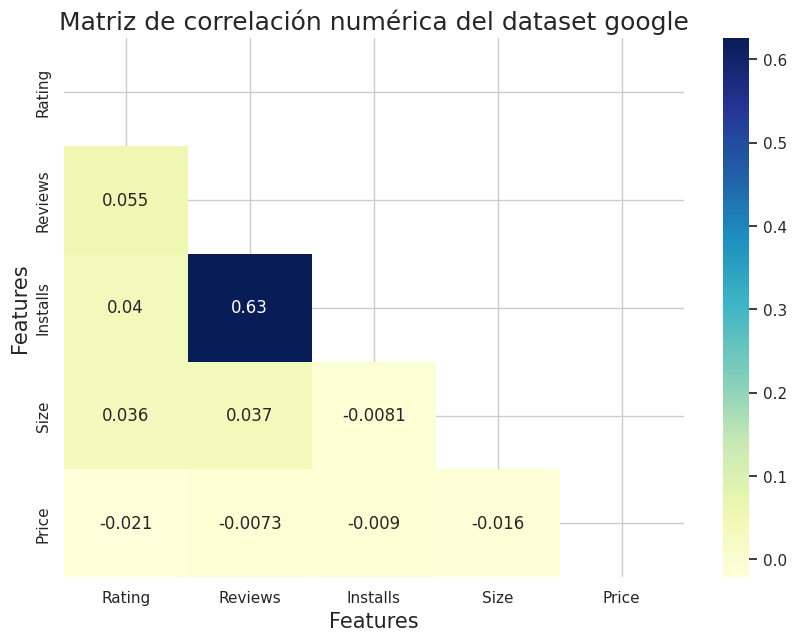

In [ ]:
mask = np.triu(np.ones_like(google_corr.corr()))

fig, axes = plt.subplots(figsize=(10, 7))

visuaheatmap = sns.heatmap(google_corr.corr(),cmap="YlGnBu", annot=True, mask=mask)

visuaheatmap.set_title('Matriz de correlación numérica del dataset google', fontsize=18)
visuaheatmap.set_xlabel('Features', fontsize=15)
visuaheatmap.set_ylabel('Features', fontsize=15)

plt.show()

Vamos a ver si existen datos outliers o atipicos en la columna reviews

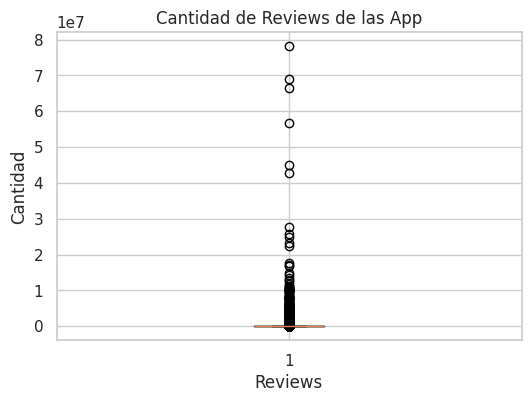

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(google['Reviews'])
plt.title('Cantidad de Reviews de las App')
plt.xlabel('Reviews')
plt.ylabel('Cantidad')
plt.show()

Antes de decidir si descartamos o no, veremos si hay una consistencia entre la cantidad de instalaciones y reviews.

In [ ]:
max_installs = np.max(google['Installs'])
max_installs

1000000000

In [ ]:
# Existe 20 datos que tienen las instalaciones con ese valor maximo
max_installs_apps = google[google['Installs'] == max_installs][['App','Reviews','Installs']]
max_installs_apps

,App,Reviews,Installs
152,Google Play Books,1433233,1000000000
336,WhatsApp Messenger,69119316,1000000000
382,Messenger – Text and Video Chat for Free,56646578,1000000000
391,Skype - free IM & video calls,10484169,1000000000
411,Google Chrome: Fast & Secure,9643041,1000000000
451,Gmail,4604483,1000000000
464,Hangouts,3419513,1000000000
1872,Subway Surfers,27725352,1000000000
2544,Facebook,78158306,1000000000
2554,Google+,4831125,1000000000


In [ ]:
google.nlargest(30,'Reviews')[['App','Reviews','Installs']]

,App,Reviews,Installs
2544,Facebook,78158306,1000000000
336,WhatsApp Messenger,69119316,1000000000
2604,Instagram,66577446,1000000000
382,Messenger – Text and Video Chat for Free,56646578,1000000000
1879,Clash of Clans,44893888,100000000
4005,Clean Master- Space Cleaner & Antivirus,42916526,500000000
1872,Subway Surfers,27725352,1000000000
3665,YouTube,25655305,1000000000
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,500000000
1878,Clash Royale,23136735,100000000


Se puede observar que hay una relación fuerte entre las instalaciones y las reviews y son consistentes los datos, por lo que no vamos aplicar el método IQR a estas 2 columnas, ya que estariamos dejando fuera información relevante para el análisis de datos.

Vamos a imputar los datos nulos de Rating, considerando el valor promedio segun la categoria que pertenece esa app (Recordemos que no hay valores duplicados en la columna App)

In [ ]:
google['Rating'] = google.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
google.shape

(9591, 17)

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9591 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9591 non-null   object        
 1   Category        9591 non-null   object        
 2   Rating          9591 non-null   float64       
 3   Reviews         9591 non-null   int64         
 4   Size            9591 non-null   float64       
 5   Installs        9591 non-null   int64         
 6   Type            9591 non-null   category      
 7   Price           9591 non-null   float64       
 8   Content_Rating  9591 non-null   object        
 9   Genres          9591 non-null   category      
 10  Last_Updated    9591 non-null   datetime64[ns]
 11  Current_Ver     9591 non-null   object        
 12  Android_Ver     9591 non-null   object        
 13  Reviews_log     9591 non-null   float64       
 14  Installs_log    9591 non-null   float64       
 15  year    

## **Reviews**

In [ ]:
reviews.shape

(64295, 5)

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [ ]:
reviews[reviews.isnull().any(axis=1)]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Si tenemos App donde no tiene información sobre la polaridad, subjectividad y sentimiento, no tiene sentido mantener esos datos nulos, por lo que dropearemos esos datos nulos

In [ ]:
reviews = reviews.dropna()

# ***Visualizaciones***

### ***Análisis univariados:*** usamos método IQR para detectar los outliers de los reviews, instalaciones, rating y precios de las app

### **Boxplot**

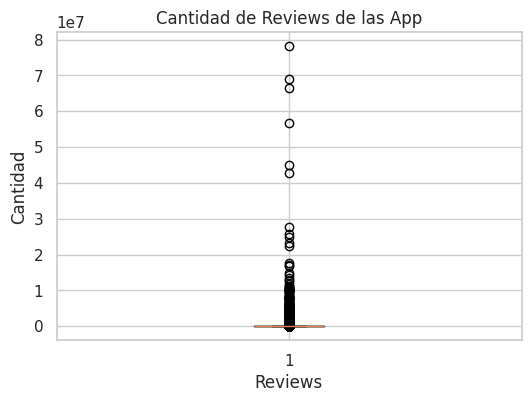

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(google['Reviews'])
plt.title('Cantidad de Reviews de las App')
plt.xlabel('Reviews')
plt.ylabel('Cantidad')
plt.show()

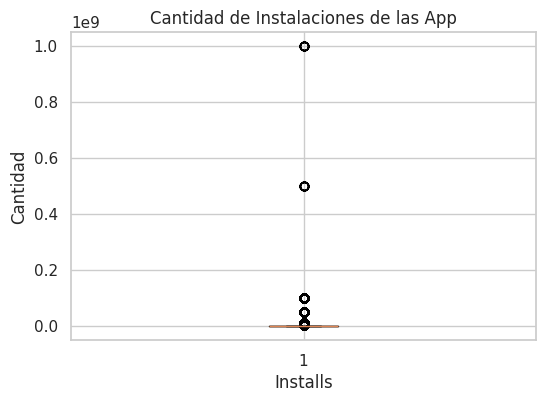

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(google['Installs'])
plt.title('Cantidad de Instalaciones de las App')
plt.xlabel('Installs')
plt.ylabel('Cantidad')
plt.show()

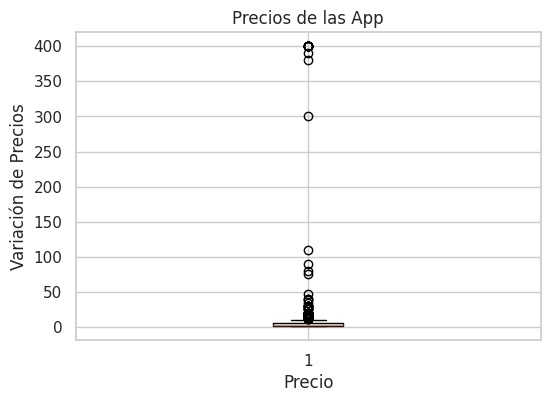

In [ ]:
pago = google[google['Type'] == 'Paid']

plt.figure(figsize=(6,4))
plt.boxplot(pago['Price'])
plt.title('Precios de las App')
plt.xlabel('Precio')
plt.ylabel('Variación de Precios')
plt.show()

Vemos que hay un promedio de Rating entre 4.17

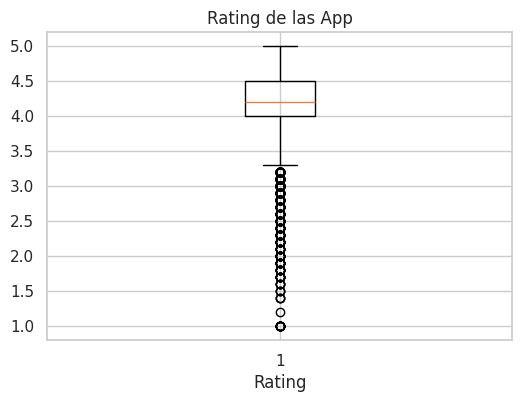

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(google['Rating'])
plt.title('Rating de las App')
plt.xlabel('Rating')
plt.show()

In [ ]:
promedioRating = google['Rating'].mean()
promedioRating

np.float64(4.173599333541022)

### ***Histograma***

**¿Cúal es la cantidad de instalaciones que tienen las apps?**

  Como la Col Installs y Reviews es muy variado, se va tener cuidado ya que no podemos usar esa escala normal, por lo que lo llevaremos a una escala logaritmica para poder graficar el histograma

Podemos observar que las instalaciones son variadas, tenemos app con pocas instalaciones como así app con gran cantidad de instalaciones.



Text(0, 0.5, 'Frecuencia')

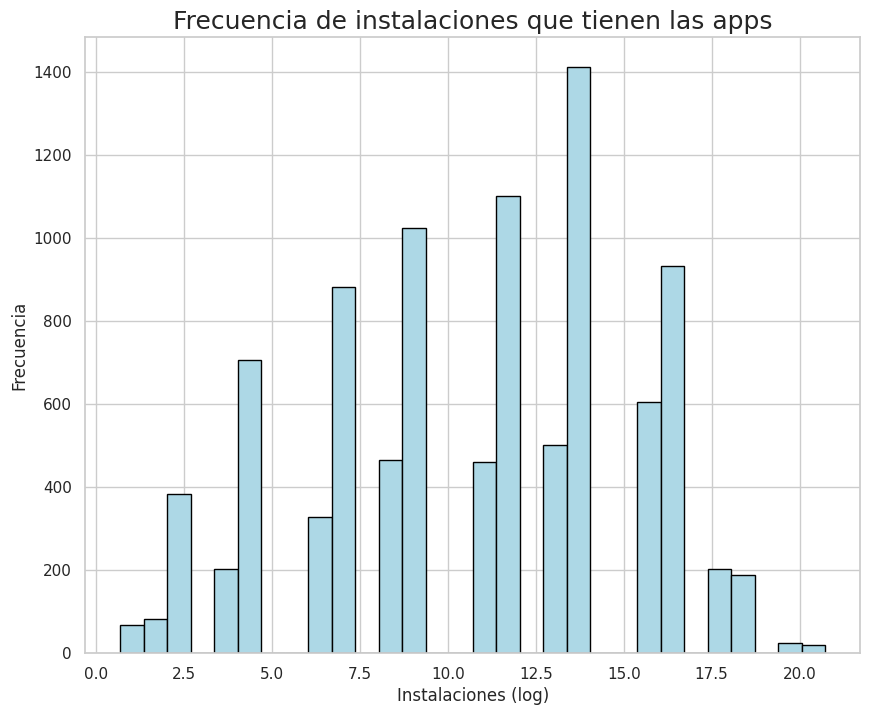

In [ ]:
histograma = google['Installs_log'].plot.hist(bins=30, color='lightblue', edgecolor='black', figsize=(10,8))
histograma.set_title('Frecuencia de instalaciones que tienen las apps', fontsize=18)
histograma.set_xlabel('Instalaciones (log)')
histograma.set_ylabel('Frecuencia')

**¿Como es la frecuencia de las reviews que tienen las apps?**

Al igual que install, se lleva a una escala logaritmica, para tener una mejor apreciación en la visualizacion y podemos ver que predomina app con ninguna reviews, es posible que sea una app nueva. y las que tenga mayor reviews deben ser app que predominan hace mucho en el mercado. Lo analizaremos más adelante

<Axes: title={'center': 'Frecuencia de Reviews que tienen las apps'}, xlabel='Reviews (log)', ylabel='Frecuencia'>

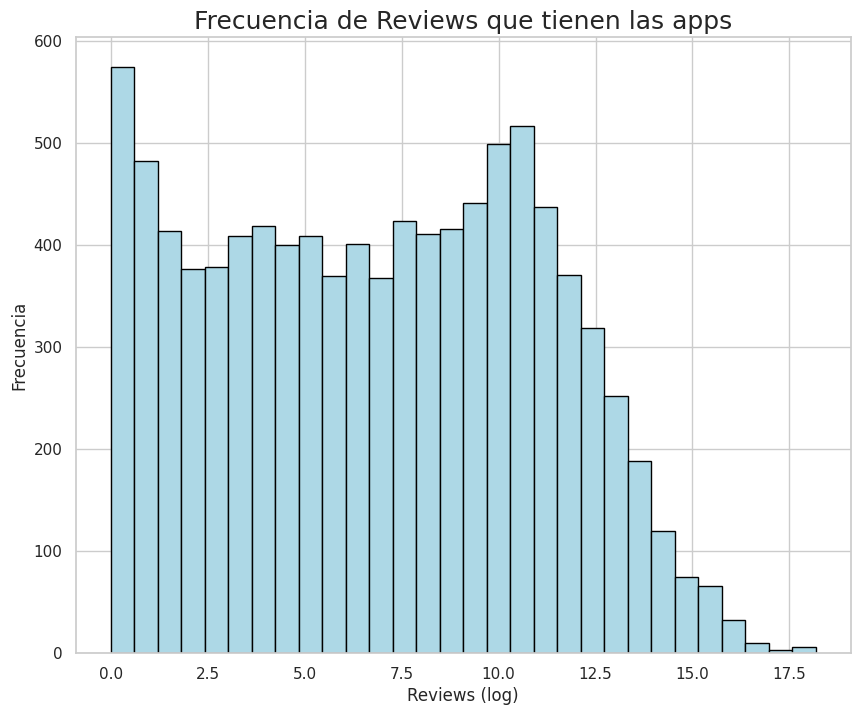

In [ ]:
histograma2 = google['Reviews_log'].plot.hist(bins=30, color='lightblue', edgecolor='black', figsize=(10,8))
histograma2.set_title('Frecuencia de Reviews que tienen las apps', fontsize=18)
histograma2.set_xlabel('Reviews (log)')
histograma2.set_ylabel('Frecuencia')
histograma2

### ***Análisis bivariados:***

### ***Boxplot***

**Las instalaciones descargadas, ¿el usuario está satisfecho con el producto?**

A pesar de que predomina las aplicaciones gratuitas con más descargas, se observa que el promedio de comentarios positivos predomina más en las aplicaciones pagas.

In [ ]:
merged = reviews.merge(google, on='App', how='inner')

Text(0, 0.5, 'Puntuación de Polaridad de Sentimiento')

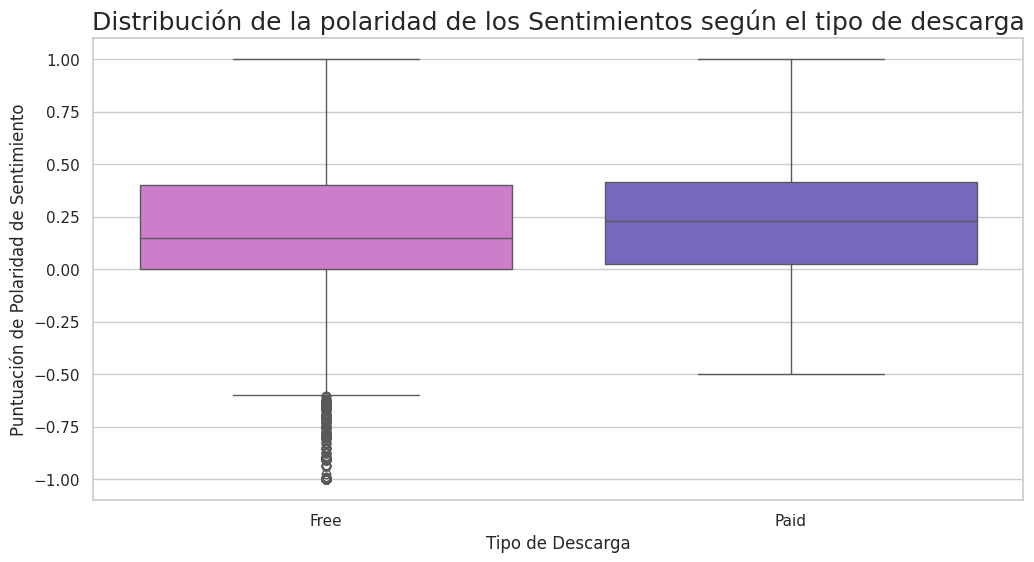

In [ ]:
plt.figure(figsize=(12, 6))

boxplot1 = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged,  palette=['orchid','slateblue'])
boxplot1.set_title("Distribución de la polaridad de los Sentimientos según el tipo de descarga", fontsize=18)
boxplot1.set_xlabel("Tipo de Descarga")
boxplot1.set_ylabel("Puntuación de Polaridad de Sentimiento")

Text(0, 0.5, 'Instalaciones (log)')

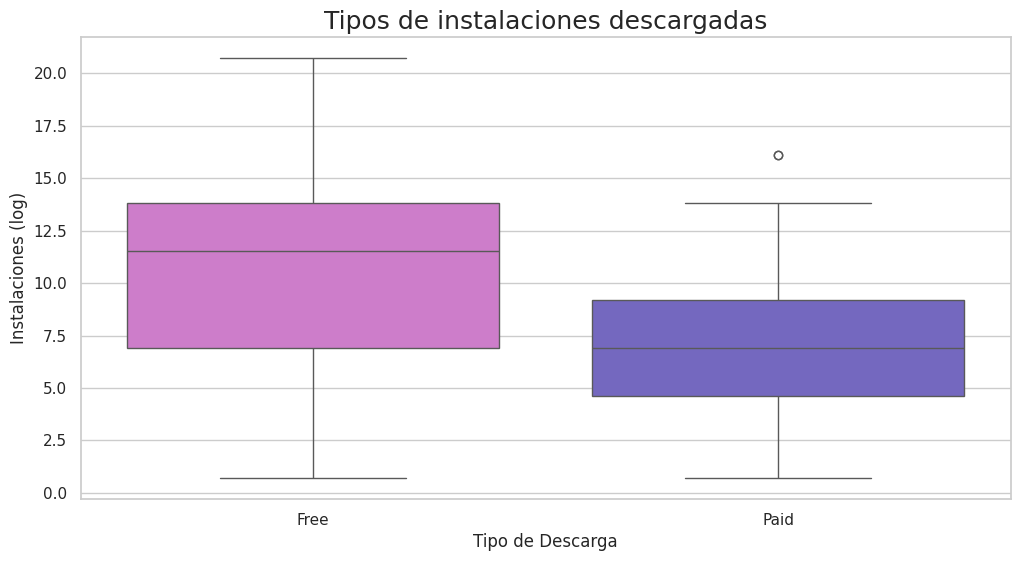

In [ ]:
plt.figure(figsize=(12, 6))

boxplot1 = sns.boxplot(x='Type', y='Installs_log', data=google,  palette=['orchid','slateblue'])
boxplot1.set_title("Tipos de instalaciones descargadas", fontsize=18)
boxplot1.set_xlabel("Tipo de Descarga")
boxplot1.set_ylabel("Instalaciones (log)")

### ***Scatter***

**¿La subjectividad del sentimiento es proporcional a la polaridad del sentimiento?**

De la visualización **scatter** podemos ver que que no siempre es proporcional, pero si podemos ver que hay una gran concentración de polaridad positiva.

In [ ]:
dfmerged=merged.dropna()

Text(0, 0.5, 'Polaridad')

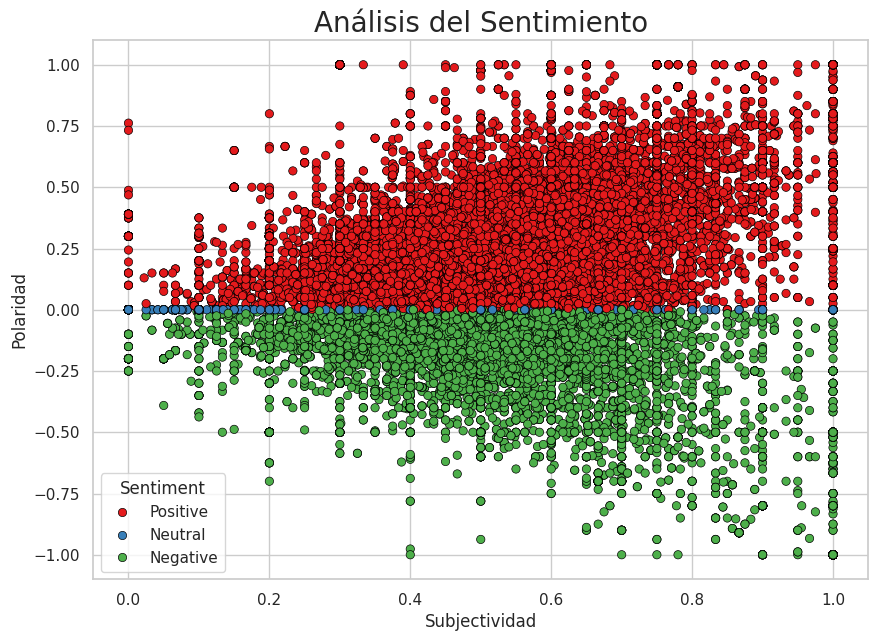

In [ ]:
plt.figure(figsize=(10, 7))

scatter=sns.scatterplot(x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue = 'Sentiment', data= dfmerged,  edgecolor='black', palette="Set1")

scatter.set_title("Análisis del Sentimiento", fontsize=20)
scatter.set_xlabel("Subjectividad")
scatter.set_ylabel("Polaridad")

**¿Las aplicaciones con mas reviews tienen mas instalaciones?**

En el gráfico de dispersión entre la cantidad de reviews y cantidad de instalaciones, observamos una tendencia ascendente.Lo que nos sugiere que las aplicaciones con un mayor número de reviews tienden a tener más instalaciones. A su vez nos muestra que hay instalaciones que sin ninguna reviews. Entonces no podemos rechazar la hipótesis, nos indica que una mayor interacción de los usuarios (mayor cantidad de comentarios) puede estar asociada a una mayor visibilidad y, por ende, a un mayor número de descargas.

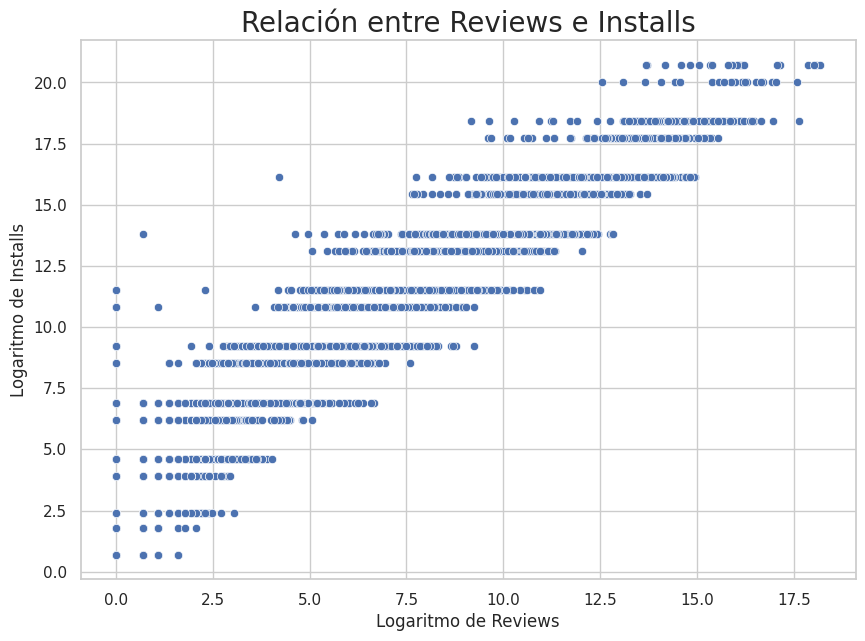

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x='Reviews_log', y='Installs_log', data=google)
plt.title('Relación entre Reviews e Installs', fontsize=20)
plt.xlabel('Logaritmo de Reviews')
plt.ylabel('Logaritmo de Installs')
plt.show()

**¿Las aplicaciones con más reseñas tienen un mejor rating?**

Como mencionamos en el heatmap, vimos que **Reviews** tiene una fuerte relación con **Rating**


Observamos que a medida que el número de reseñas aumenta, las aplicaciones tienden a mantener un rating elevado y rondando en 4.5. Esto sugiere que las aplicaciones con más reseñas no solo tienen una mayor validación por parte de los usuarios, sino que también mantienen una buena percepción de calidad.No se puede rechazar la hipotesis ya que una mayor cantidad de reseñas parece estar asociada con un rating más alto y estable, lo cual refuerza la percepción de que las aplicaciones con un buen desempeño y popularidad tienden a tener mejores calificaciones

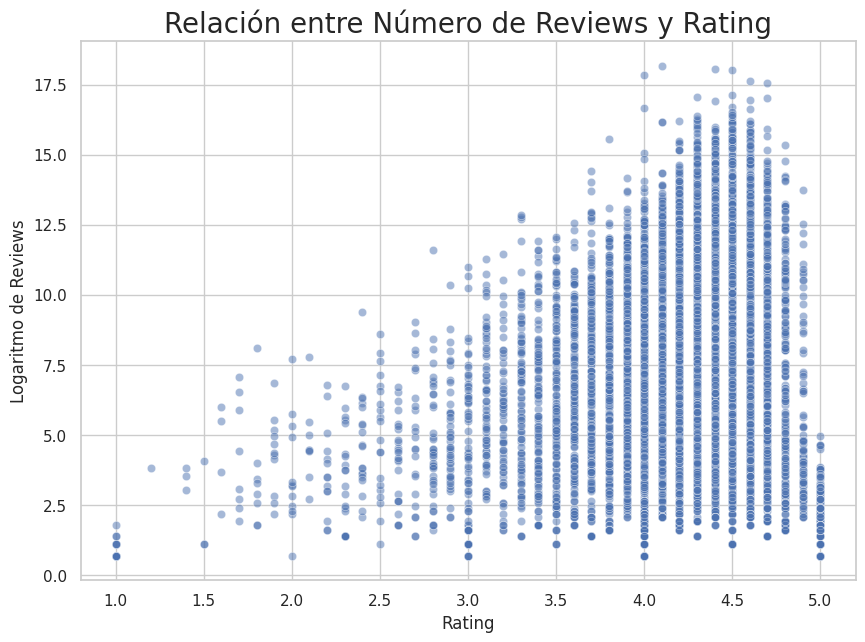

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(y='Reviews_log', x='Rating', data=google, alpha=0.5)
plt.title('Relación entre Número de Reviews y Rating', fontsize=20)
plt.ylabel('Logaritmo de Reviews')
plt.xlabel('Rating')
plt.show()

**¿Cúal es el rango de edad que otorga más reviews?**

Sacando a la categoria Everyone, vemos que el grupo Teen son los que más reseñas deja, esto nos dá a entender que són los mayores consumidores en la descarga de las app

In [ ]:
reviewsDeLasCategorias = google.groupby('Content_Rating').agg({'Reviews_log': ['min', 'max', 'mean', 'count']}).stack()
reviewsDeLasCategorias

Reviews_log
Content_Rating                           
Everyone       min                   0.00
               max                  18.05
               mean                  6.51
               count             7,843.00
Everyone 10+   min                   0.00
               max                  17.62
               mean                  9.23
               count               320.00
Mature 17+     min                   0.00
               max                  16.27
               mean                  7.86
               count               395.00
Teen           min                   0.00
               max                  18.17
               mean                  8.28
               count             1,033.00

[Text(0, 0, 'Everyone'),
 Text(1, 0, 'Teen'),
 Text(2, 0, 'Everyone 10+'),
 Text(3, 0, 'Mature 17+')]

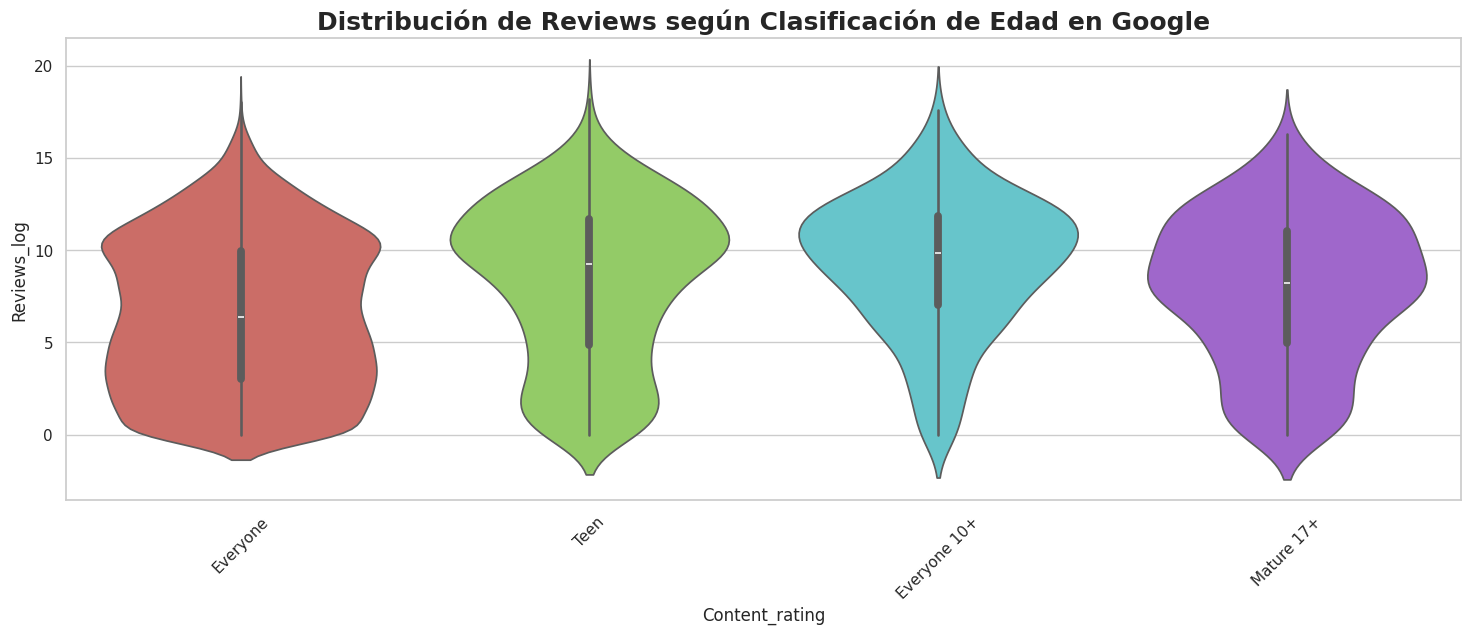

In [ ]:
plt.figure(figsize=(18, 6))

violinPlot = sns.violinplot(data = google, x="Content_Rating", y="Reviews_log", hue="Content_Rating", legend = False , palette = "hls")

violinPlot.set_title("Distribución de Reviews según Clasificación de Edad en Google", fontsize=18, fontweight= 'heavy')
violinPlot.set_xlabel("Content_rating")
violinPlot.set_ylabel("Reviews_log")
violinPlot.set_xticklabels(violinPlot.get_xticklabels(), rotation=45)

## **Análisis Multivariado**

**¿Cuál es el rating promedio que le da los usuarios según a la categoria de edad que pertenece?**

Vemos que en todas las categorias las app pagas, tienen un poco mejor su rating promedio

In [ ]:
tabla = google.groupby(['Content_Rating', 'Type']).agg({'Rating': ['min','max','mean','count']})
tabla.columns = ['Rating_min','Rating_max','Rating_mean','Rating_count']
tabla

Rating_min           Rating_max  \
Content_Rating Type                                             
Everyone       Free                 1.00                 5.00   
               Paid                 1.00                 5.00   
Everyone 10+   Free                 1.80                 5.00   
               Paid                 3.40                 4.70   
Mature 17+     Free                 1.00                 5.00   
               Paid                 3.50                 5.00   
Teen           Free                 2.00                 5.00   
               Paid                 3.40                 5.00   

                             Rating_mean  Rating_count  
Content_Rating Type                                     
Everyone       Free                 4.16          6073  
               Paid                 4.24           506  
Everyone 10+   Free                 4.22           273  
               Paid                 4.31            31  
Mature 17+     Free                 4.11           344  
               Paid                 4.46            15  
Teen           Free                 4.21           866  
               Paid                 4.44            45

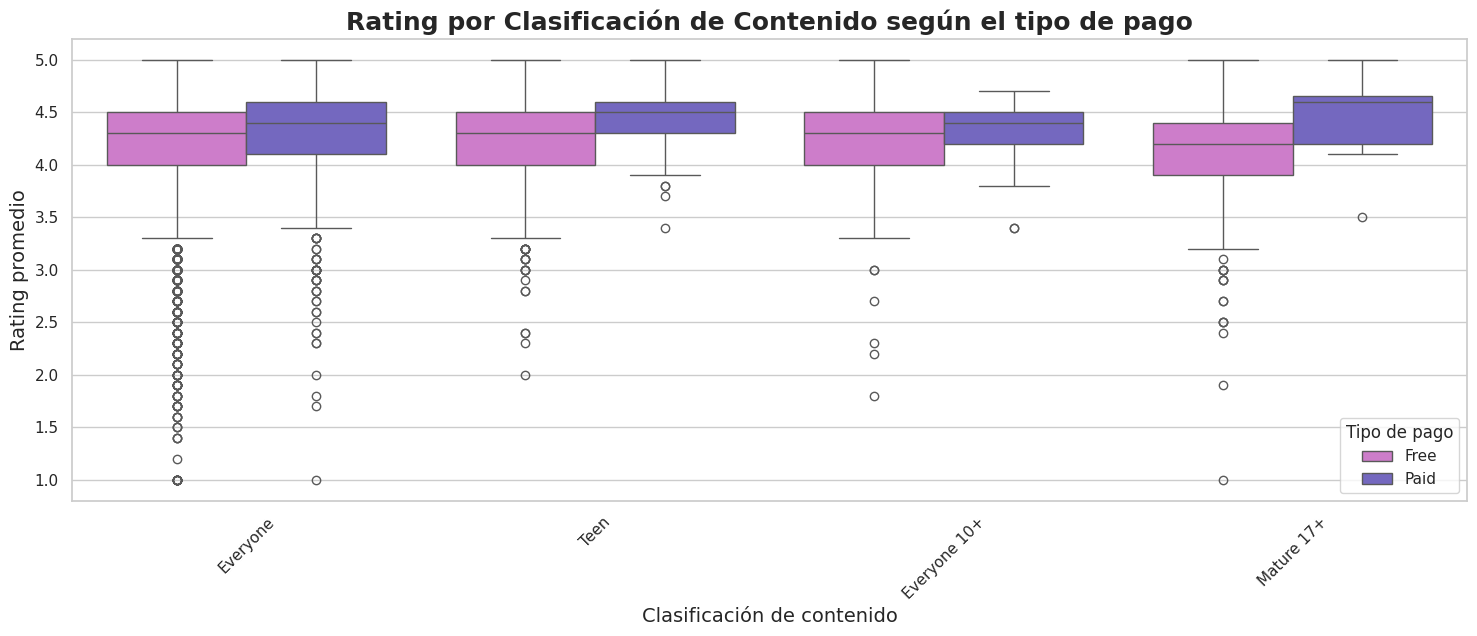

In [ ]:
plt.figure(figsize=(18, 6))

sns.boxplot(data=google, x='Content_Rating', y='Rating', hue='Type',  palette=['orchid','slateblue'])

plt.title("Rating por Clasificación de Contenido según el tipo de pago",fontsize=18, fontweight = 'heavy')
plt.ylabel("Rating promedio",fontsize=14)
plt.xlabel("Clasificación de contenido",fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Tipo de pago')
plt.show()

# **Conclusiones de EDA e Hipótesis**

Se identificó que las variables "Reviews" e "Installs" tienen una fuerte relación. Dado que los valores en "Reviews" e "Installs" presentan una amplia dispersión, fue necesario aplicar una escala logarítmica para representar correctamente los datos en histogramas. A su vez detectammos que hay aplicaciones con ninguna instalación por lo que optamos descartarlo de nuestro análisis

En relación a las aplicaciones pagas o gratis, se observa que tiene mejor comentario las app pagas pese a que las apps gratuitas se descargan más.

A su vez observamos que existe un gran mercado de consumidores teens y por último y no menos importante notamos que el Rating es más elevado a medida que es mayor la cantidad de las reviews



# **Nuevos features**

Vamos agregar nuevos features, para que el modelo sea un poco mas robusto a la hora de predecir

In [ ]:
def categorize_reviews(x):
    if x < 1000:
        return 'Baja'
    elif x < 10000:
        return 'Medio'
    elif x < 100000:
        return 'Alto'
    else:
        return 'Muy_Alto'

google['Level_Reviews'] = google['Reviews'].apply(categorize_reviews)

In [ ]:
google.Level_Reviews.value_counts()

,count
Level_Reviews,
Baja,4806
Alto,1819
Medio,1523
Muy_Alto,1443


In [ ]:
def categorize_installs(x):
    if x < 1e4:
        return 'Baja'
    elif x < 1e6:
        return 'Media'
    else:
        return 'Alta'

google['Popularity_Installs'] = google['Installs'].apply(categorize_installs)

In [ ]:
google.Popularity_Installs.value_counts()

,count
Popularity_Installs,
Alta,3386
Baja,3116
Media,3089


# **Entrenamiento**

El objetivo de este entrenamiento es predecir el **Rating** que tiene una aplicación, por lo que será esa nuestra variable a predecir.
Entonces aplicaremos a nuestros modelos de aprendizaje de Regresión numerica continua

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Para el encodeo
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# Para los modelos de regresión, usaremos el Lineal, XGBoost y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Para las métricas (Errores)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
!pip install category_encoders

## **Dataframe a entrena**r

Vemos que los patrones que más influyen sobre que aplicaciones són más prospenso a descarga, son:

* Rating: es el puntaje que tiene una aplicación
* Type: si es gratis o pago
* Reviews: usuarios se fijan en la cantidad de Reseñas
* Category: el tipo de categoria que son mas descargadas
* Installs: si esa app ha tenido muchas instalaciones
* Content_Rating: sobre que publico esta destinado la app

Se agregan nuevos features para medir, como:

* Age_of_App: última actualización de la aplicación (falta aplicar)
* Level_Reviews: popularidad de la aplicación según la cantidad de las reseñas
* Popularity_Installs: popularidad de la aplicación según la cantidad de instalaciones

In [ ]:
dfinal = google[['Rating','Type','Reviews_log','Category','Installs_log','Price','Content_Rating','Level_Reviews','Popularity_Installs']]

In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9591 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Rating               9591 non-null   float64 
 1   Type                 9591 non-null   category
 2   Reviews_log          9591 non-null   float64 
 3   Category             9591 non-null   object  
 4   Installs_log         9591 non-null   float64 
 5   Price                9591 non-null   float64 
 6   Content_Rating       9591 non-null   object  
 7   Level_Reviews        9591 non-null   object  
 8   Popularity_Installs  9591 non-null   object  
dtypes: category(1), float64(4), object(4)
memory usage: 683.9+ KB


## **Separando variables a predecir**

In [ ]:
x = dfinal.drop('Rating', axis=1)
y = dfinal['Rating']

##**Separo variable de entrenamiento y test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Encoder**

1. **OneHotEncoder:** usaremos para los features que tienen menos de 10 categorias, se usará OneHotEncode
2. **MeanEnconding o TargetEncoding:** usaremos para los features con mas de 10 categories se usara MeanEncoding

## **1- OneHotEnconder**

In [ ]:
#Variables a encodear: Type (2), Content_Rating(4), Level_Reviews(2) y Popularity_Installs(3)

categoricasColumns = ['Type', 'Content_Rating', 'Level_Reviews','Popularity_Installs']

enc = OneHotEncoder(handle_unknown="ignore")

for col in categoricasColumns:
    if col == 'Type':
        encoder = OneHotEncoder(handle_unknown="ignore", drop='first')
    else:
        encoder = enc

    # Para x_train
    encoder_x_train = encoder.fit_transform(x_train[[col]]).todense()
    encoder_x_train = pd.DataFrame(encoder_x_train)
    encoder_x_train.columns = encoder.get_feature_names_out([col])
    encoder_x_train.index = x_train.index
    x_train = pd.concat([x_train, encoder_x_train], axis=1).drop(columns=col)

    # Para x_test
    encoder_x_test = encoder.transform(x_test[[col]]).todense()
    encoder_x_test = pd.DataFrame(encoder_x_test)
    encoder_x_test.columns = encoder.get_feature_names_out([col])
    encoder_x_test.index = x_test.index
    x_test = pd.concat([x_test, encoder_x_test], axis=1).drop(columns=col)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1919 entries, 6310 to 8935
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews_log                  1919 non-null   float64
 1   Category                     1919 non-null   object 
 2   Installs_log                 1919 non-null   float64
 3   Price                        1919 non-null   float64
 4   Type_Paid                    1919 non-null   float64
 5   Content_Rating_Everyone      1919 non-null   float64
 6   Content_Rating_Everyone 10+  1919 non-null   float64
 7   Content_Rating_Mature 17+    1919 non-null   float64
 8   Content_Rating_Teen          1919 non-null   float64
 9   Level_Reviews_Alto           1919 non-null   float64
 10  Level_Reviews_Baja           1919 non-null   float64
 11  Level_Reviews_Medio          1919 non-null   float64
 12  Level_Reviews_Muy_Alto       1919 non-null   float64
 13  Popularity_Installs_

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7672 entries, 9012 to 8485
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Reviews_log                  7672 non-null   float64
 1   Category                     7672 non-null   object 
 2   Installs_log                 7672 non-null   float64
 3   Price                        7672 non-null   float64
 4   Type_Paid                    7672 non-null   float64
 5   Content_Rating_Everyone      7672 non-null   float64
 6   Content_Rating_Everyone 10+  7672 non-null   float64
 7   Content_Rating_Mature 17+    7672 non-null   float64
 8   Content_Rating_Teen          7672 non-null   float64
 9   Level_Reviews_Alto           7672 non-null   float64
 10  Level_Reviews_Baja           7672 non-null   float64
 11  Level_Reviews_Medio          7672 non-null   float64
 12  Level_Reviews_Muy_Alto       7672 non-null   float64
 13  Popularity_Installs_

## **2- MeanEncoding**

In [ ]:
dfinal.Category.unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ...,
                          'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']

In [ ]:
#Variables a encodear: category(33)

columnasME = ['Category']

for col in columnasME:
   menc_x_train = x_train.copy()
   menc_x_train['Rating'] = y_train
   Mean_encoded = menc_x_train.groupby([col])['Rating'].mean().to_dict()

    #Para el train
   x_train[col] = x_train[col].map(Mean_encoded)

    #Para test
   x_test[col] = x_test[col].map(Mean_encoded)

   mean_global = y_train.mean()
   x_test[col] = x_test[col].fillna(mean_global)

## **Entrenamos con los distintos modelos**

Para todos los modelos se va evaluar los sgtes errores:

*   Error Cuadratico Medio (MSE)
*   Error Absoluto Medio (MAE)
* Error Raiz Cuadratica Medio (RMSE)
* Error coeficiente de determinación (R²)

# **Modelo 1: Regresión Lineal**

In [ ]:
modelRL = LinearRegression()
modelRL.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = modelRL.predict(x_test)
y_pred_train = modelRL.predict(x_train)

**Evaluación del modelo: Errores y métricas de la función lineal**

In [ ]:
# Calculo de errores en el test
errorL_mse = mean_squared_error(y_test, y_pred)
errorL_rmse = np.sqrt(errorL_mse)
errorL_mae = mean_absolute_error(y_test, y_pred)
L_r2 = r2_score(y_test, y_pred)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", errorL_mse)
print("RMSE (Test):", errorL_rmse)
print("MAE (Test):", errorL_mae)
print("R² (Test):", L_r2)

# Calculo de errores sobre el train
errorL_mse_train = mean_squared_error(y_train, y_pred_train)
errorL_rmse_train = np.sqrt(errorL_mse_train)
errorL_mae_train = mean_absolute_error(y_train, y_pred_train)
L_r2_train = r2_score(y_train, y_pred_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorL_mse_train)
print('RMSE (Train):', errorL_rmse_train)
print("MAE (Train):", errorL_mae_train)
print('R² Score (Train):', L_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.22558090302601994
RMSE (Test): 0.4749535798644115
MAE (Test): 0.3197276352817899
R² (Test): 0.1096244438852565

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.21135536804761867
RMSE (Train): 0.45973401880611214
MAE (Train): 0.3099199676097158
R² Score (Train): 0.1307474683421942


**Identificar los features más importantes para predecir el Rating de la app**

In [ ]:
columnas = x_train.columns

In [ ]:
modelRL.coef_

array([ 1.01059952e-01,  8.71244803e-01, -9.09519767e-02, -4.76346768e-04,
       -2.81291938e-02,  3.08712413e-02, -2.02910579e-03, -9.60843441e-03,
       -1.92337011e-02,  5.76724631e-02, -1.27459421e-01, -4.41829998e-02,
        1.13969957e-01, -6.99919429e-02,  8.96396294e-02, -1.96476865e-02])

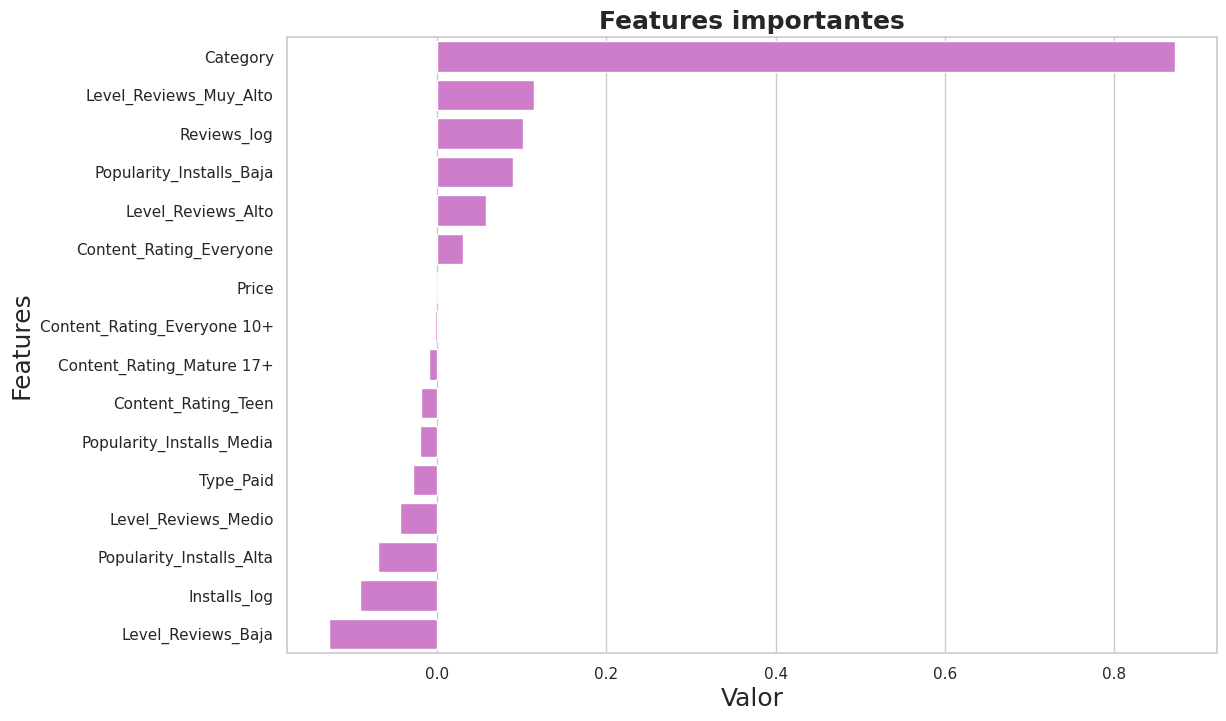

In [ ]:
importances = pd.DataFrame(data={'Atributos': columnas,'Importancia': modelRL.coef_})
importances = importances.sort_values(by='Importancia', ascending=False)
importances = importances.set_index('Atributos')

plt.figure(figsize=(12, 8))

sns.barplot(x='Importancia', y=importances.index, data=importances, color='orchid')
plt.xlabel('Valor',fontsize=18)
plt.ylabel('Features',fontsize=18)
plt.title('Features importantes',fontsize=18, fontweight = 'heavy')
plt.show()

# **Modelo 2: XGBoost**


Hiper-parámetros


* **learning_rate:** tasa de aprendizaje
* **max_depth:** máx profundidad de c/árbol
* **subsample:** porcentaje de muestras usadas para cada arbol (valor muy bajo, posbile underfittig)
*  **colsample_bytree:** porcentaje de features usadas para c/arbol (valores muy alto, poisble overfitting)
*  **n_estimators:** cant de arboles a construir
*  **objective:** funcion de error a utilizar (ejm: reg: squarederror, parar regresion, re_logistic o binary para clasificacion)

Parametros de regularización:

*  **gamma:** umbral para hacer split basado en la reducción de error de hacer el nuevo split
*  **alpha:** regularización para los pesos de las hojas. Un valor más alto genera una mayor regularización
*  **lambda:** similar alpha pero para la sintonia fina.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import top_k_accuracy_score

***Entrenamiento de un modelo de XGBoost con hiperparámetros por default***

In [ ]:
model_xgb_regresion = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10, random_state = 42)
model_xgb_regresion.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred = model_xgb_regresion.predict(x_test)
y_pred_train = model_xgb_regresion.predict(x_train)

In [ ]:
# Calculo de errores en el test
errorXG_mse = mean_squared_error(y_test, y_pred)
errorXG_rmse = np.sqrt(errorL_mse)
errorXG_mae = mean_absolute_error(y_test, y_pred)
XG_r2 = r2_score(y_test, y_pred)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", errorXG_mse)
print("RMSE (Test):", errorXG_rmse)
print("MAE (Test):", errorXG_mae)
print("R² (Test):", XG_r2)

# Calculo de errores sobre el train
errorXG_mse_train = mean_squared_error(y_train, y_pred_train)
errorXG_rmse_train = np.sqrt(errorL_mse_train)
errorXG_mae_train = mean_absolute_error(y_train, y_pred_train)
XG_r2_train = r2_score(y_train, y_pred_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorXG_mse_train)
print('RMSE (Train):', errorXG_rmse_train)
print("MAE (Train):", errorXG_mae_train)
print('R² Score (Train):', XG_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.2436412842935463
RMSE (Test): 0.4749535798644115
MAE (Test): 0.33106541189372407
R² (Test): 0.038339499995909354

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.23253861029842188
RMSE (Train): 0.45973401880611214
MAE (Train): 0.3218485431182542
R² Score (Train): 0.04362601443579195


**Pruebo dandole más profundidad al árbol y más árboles a construir**

In [ ]:
model_xgb_regresion2 = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 20, alpha = 10, n_estimators = 200, random_state = 42)
model_xgb_regresion2.fit(x_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred = model_xgb_regresion2.predict(x_test)
y_pred_train = model_xgb_regresion2.predict(x_train)

In [ ]:
# Calculo de errores en el test
errorXG2_mse = mean_squared_error(y_test, y_pred)
errorXG2_rmse = np.sqrt(errorL_mse)
errorXG2_mae = mean_absolute_error(y_test, y_pred)
XG2_r2 = r2_score(y_test, y_pred)

# Métricas
print("Métricas en el conjunto de prueba:")
print("MSE (Test):", errorXG2_mse)
print("RMSE (Test):", errorXG2_rmse)
print("MAE (Test):", errorXG2_mae)
print("R² (Test):", XG2_r2)

# Calculo de errores sobre el train
errorXG2_mse_train = mean_squared_error(y_train, y_pred_train)
errorXG2_rmse_train = np.sqrt(errorL_mse_train)
errorXG2_mae_train = mean_absolute_error(y_train, y_pred_train)
XG2_r2_train = r2_score(y_train, y_pred_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorXG2_mse_train)
print('RMSE (Train):', errorXG2_rmse_train)
print("MAE (Train):", errorXG2_mae_train)
print('R² Score (Train):', XG2_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.22327389772054532
RMSE (Test): 0.4749535798644115
MAE (Test): 0.31335544529509396
R² (Test): 0.11873027289944704

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.19944922322511377
RMSE (Train): 0.45973401880611214
MAE (Train): 0.2973100958520335
R² Score (Train): 0.17971450724378069


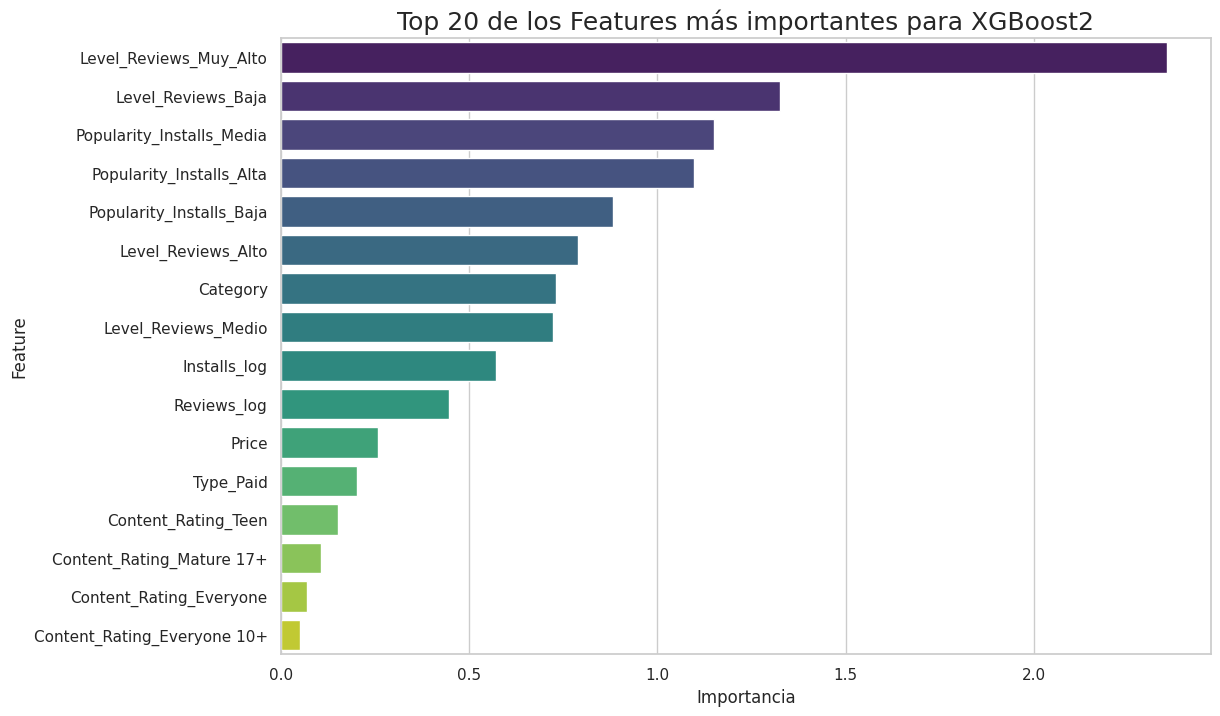

In [ ]:
importance_dict = model_xgb_regresion2.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importancia': list(importance_dict.values())
}).sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(12, 8))

sns.barplot(data=importance_df.head(20), x='Importancia', y='Feature', palette='viridis')
plt.title('Top 20 de los Features más importantes para XGBoost2', fontsize=18)
plt.show()

# **Modelo 3: Árbol de decisión**


En este punto se debe entrenar (mediante cross-validation)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold

In [ ]:
modelAD = DecisionTreeRegressor(random_state=42)

Aplico cross-validation a mi train

In [ ]:
cv_scores = cross_val_score(modelAD, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_scores)

Resultado de cross-validation

In [ ]:
print("Cross-validated MSE (train):", cv_scores)
print("Cross-validated Promedio de MSE (train):", cv_scores.mean())
print('Cross-validated RMSE scores (train):', cv_rmse_scores)

Cross-validated MSE (train): [0.3917361  0.38535956 0.42371328 0.38540735 0.39935951]
Cross-validated Promedio de MSE (train): 0.39711516010370407
Cross-validated RMSE scores (train): [0.62588825 0.62077335 0.65093262 0.62081185 0.63194898]


Entrenamos y predecimos el modelo

In [ ]:
modelAD.fit(x_train, y_train)
y_pred_AD = modelAD.predict(x_test)
y_pred_AD_train = modelAD.predict(x_train)

**Evaluación del modelo**

In [ ]:
# Calculo de errores sobre el test
errorAD_mse = mean_squared_error(y_test, y_pred_AD)
errorAD_rmse = np.sqrt(errorAD_mse)
errorAD_mae = mean_absolute_error(y_test, y_pred_AD)
AD_r2 = r2_score(y_test, y_pred_AD)

# Metricas sobre test
print("Métricas en el conjunto de prueba:")
print('MSE (Test):', errorAD_mse)
print('RMSE (Test):', errorAD_rmse)
print("MAE (Test):", errorAD_mae)
print('R² Score (Test):', AD_r2)

# Calculo de errores sobre el train
errorAD_mse_train = mean_squared_error(y_train, y_pred_AD_train)
errorAD_rmse_train = np.sqrt(errorAD_mse_train)
errorAD_mae_train = mean_absolute_error(y_train, y_pred_AD_train)
AD_r2_train = r2_score(y_train, y_pred_AD_train)

# Metricas sobre train
print("\nMétricas en el conjunto de entrenamiento:")
print('MSE (Train):', errorAD_mse_train)
print('RMSE (Train):', errorAD_rmse_train)
print("MAE (Train):", errorAD_mae_train)
print('R² Score (Train):', AD_r2_train)

Métricas en el conjunto de prueba:
MSE (Test): 0.4239467716888662
RMSE (Test): 0.6511119501966357
MAE (Test): 0.4299782139209566
R² Score (Test): -0.6733324387924113

Métricas en el conjunto de entrenamiento:
MSE (Train): 0.029936359049209785
RMSE (Train): 0.1730212676210927
MAE (Train): 0.03893812734946218
R² Score (Train): 0.8768791342632006


# **Cuadro de resultados**

In [ ]:
cuadro = pd.DataFrame({
                      'Modelos':  ['Regresión Lineal', 'XGBoost', 'Arbol de decisión'],
                      'MSE':      [errorL_mse, errorXG2_mse, errorAD_mse],
                      'RMSE':     [errorL_rmse, errorXG2_rmse, errorAD_rmse],
                      'MAE':      [errorL_mae, errorXG2_mae, errorAD_mae],
                      'R²-Score': [L_r2, XG2_r2, AD_r2]
                      })

In [ ]:
titulo = 'Cuadro comparativo de los modelos'
print(titulo.center(100))
print(cuadro)

                                 Cuadro comparativo de los modelos                                  
             Modelos                  MSE                 RMSE  \
0   Regresión Lineal                 0.23                 0.47   
1            XGBoost                 0.22                 0.47   
2  Arbol de decisión                 0.42                 0.65   

                   MAE                   R²  
0                 0.32                 0.11  
1                 0.31                 0.12  
2                 0.43                -0.67  


# **Conclusiones**

En función a las métricas, eligiriamos XGBoost ya que:

MSE (Error Cuadrático Medio): XGBoost tiene el MSE más bajo (0.22), lo que indica que en promedio sus predicciones son las más precisas.
RMSE (Raíz del Error Cuadrático Medio): XGBoost también tiene el RMSE más bajo (0.47), lo que muestra que, en promedio, las predicciones están más cerca de los valores reales.
MAE (Error Absoluto Medio): XGBoost presenta el MAE más bajo (0.31), lo que significa que tiene menos errores absolutos en las predicciones
R² Score (Coeficiente de Determinación): XGBoost tiene el R² más alto (0.12)


Las features más relevantes para que sea más acertado el Rating són Level_Reviews_Muy_Alto, seguido por Level_reviews_baja y despues la popularidad de las instalaciones